Allison Forte

January 3, 2023

DSC 550

Exercise 4.2 Predicting Fuel Efficiency

# Build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles. 

1. Load the data as a Pandas data frame and ensure that it imported correctly.
2. Prep the data for modeling:
a. Remove the car name column.
b. The horsepower column likely imported as a string. Figure out why and replace strings with the column mean.
c. Create dummy variables for the origin column.
3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
4. Plot mpg vs weight. Analyze the graph. Explain how it relates to the corresponding correlation coefficient.
5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.
6. Train an ordinary linear regression on the training data.
7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.
8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [30]:
# 1. Load the data as a Pandas data frame and ensure that it imported correctly.

import pandas as pd

auto_mpg = pd.read_csv('/Users/allison.forte/Downloads/auto-mpg.csv')

auto_mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [31]:
# 2. Prep the data for modeling:

# a. Remove the car name column.

auto_mpg = auto_mpg.drop('car name', axis = 1)


# b. The horsepower column likely imported as a string. Figure out why and replace strings with the column mean.

auto_mpg['horsepower'] = auto_mpg['horsepower'].apply(pd.to_numeric, errors = 'coerce')
auto_mpg['horsepower'].fillna(auto_mpg['horsepower'].mean(), inplace = True)


# c. Create dummy variables for the origin column.

dummies = pd.get_dummies(auto_mpg['origin'], prefix = 'origin', prefix_sep = '_')
auto_mpg = pd.concat([auto_mpg, dummies], axis=1, join='inner')


auto_mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0


In [35]:
# 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

correlations = round(auto_mpg.corr(), 2)
correlations

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
mpg,1.00,-0.78,-0.80,-0.77,-0.83,0.42,0.58,0.56,-0.57,0.26,0.44
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.51,-0.35,-0.56,0.60,-0.35,-0.40
displacement,-0.80,0.95,1.00,0.89,0.93,-0.54,-0.37,-0.61,0.65,-0.37,-0.43
horsepower,-0.77,0.84,0.89,1.00,0.86,-0.68,-0.41,-0.45,0.49,-0.28,-0.32
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.58,0.60,-0.30,-0.44
acceleration,0.42,-0.51,-0.54,-0.68,-0.42,1.00,0.29,0.21,-0.25,0.20,0.11
model year,0.58,-0.35,-0.37,-0.41,-0.31,0.29,1.00,0.18,-0.14,-0.02,0.19
origin,0.56,-0.56,-0.61,-0.45,-0.58,0.21,0.18,1.00,-0.92,0.25,0.89
origin_1,-0.57,0.60,0.65,0.49,0.60,-0.25,-0.14,-0.92,1.00,-0.60,-0.64
origin_2,0.26,-0.35,-0.37,-0.28,-0.30,0.20,-0.02,0.25,-0.60,1.00,-0.23


### Are there features highly correlated with mpg?

Number of cylinders, displacement, horsepower, and weight are all highly correlated with mpg.

Acceleration, model year, and origin do not have a strong correlation with mpg.

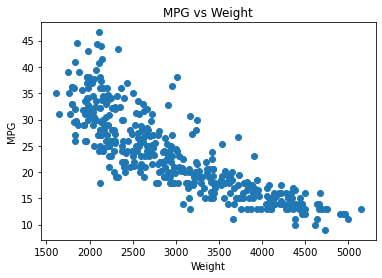

In [39]:
# 4. Plot mpg vs weight. Analyze the graph. Explain how it relates to the corresponding correlation coefficient.

import matplotlib.pyplot as plt

plt.scatter(auto_mpg['weight'], auto_mpg['mpg'])
plt.ylabel('MPG')
plt.xlabel('Weight')
plt.title('MPG vs Weight')
plt.show()

### Explain how it relates to the corresponding correlation coefficient.

The graph above shows a scatter plot of MPG compared to vehicle weight. The graph illustrates what is seen in the correlation matrix above. There is an inverse relationship between mpg and weight where as the car gets heavier, the mpg gets lower. 

The correlation coefficient for MPG and weight is -.83 indicating the strong inverse relationship that can be seen in the plot. 

In [49]:
# 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

from sklearn.model_selection import train_test_split


x = auto_mpg[['weight']]
y = auto_mpg['mpg']  

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)

In [74]:
# 6. Train an ordinary linear regression on the training data.

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

print('The linear model for the training data is y = {} X + {}'.format(model.coef_, model.intercept_))

[-0.00773861] 46.301586173632074
The linear model for the training data is y = [-0.00773861] X + 46.301586173632074


In [162]:
# 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results. 

from sklearn.metrics import mean_squared_error, mean_absolute_error 

# Calculate R2 

print('R squared for the training data is', model.score(x_train, y_train)) 
print('R squared for the test data is', model.score(x_test, y_test)) 
print('\nThe R2 score indicates the percent of the variance in the dependent variable that can \n'  
      'be explained by the independent variable using the model. In this case, over 68.7% of the variance in\n'  
      'MPG can be explained by changes in weight. The fact that R2 is slightly higher for the test data than the\n' 
      'training data indicates that our training data was a good sample for traing the model.\n') 

#  RMSE 

print('RMSE for the training data is', mean_squared_error(y_train, model.predict(x_train), squared=False)) 
print('RMSE for the test data is', mean_squared_error(y_test, model.predict(x_test), squared=False)) 
print('\nIn general, the lower the RMSE, the better the model fits the data. RMSE is a metric that calculates\n'  
      'the average distance between the model\'s predicted values and the actual values in the dataset. In this\n' 
      'case we can see the RMSE is fairly low and is slightly lower for the test dataset than the training data\n' 
      'indicating that the model fits the data well.\n') 

#  MAE 

print('MAE for the training data is', mean_absolute_error(y_train, model.predict(x_train))) 
print('MAE for the test data is', mean_absolute_error(y, model.predict(x))) 
print('\nMAE is a measure of the model\'s accuracy on the scale of the prediction target. In this case, using the \n'
      'created model on the training data, the average difference in estimated MPG and actual MPG is 3.36 mpg. \n'
      'On the test data, the average difference is 3.28 mpg. \n') 

R squared for the training data is 0.6870840909673428
R squared for the test data is 0.7093308032678254

The R2 score indicates the percent of the variance in the dependent variable that can 
be explained by the independent variable using the model. In this case, over 68.7% of the variance in
MPG can be explained by changes in weight. The fact that R2 is slightly higher for the test data than the
training data indicates that our training data was a good sample for traing the model.

RSME for the training data is 4.375122039436201
RSME for the test data is 4.1725067707974945

In general, the lower the RMSE, the better the model fits the data. RMSE is a metric that calculates
the average distance between the model's predicted values and the actual values in the dataset. In this
case we can see the RMSE is fairly low and is slightly lower for the test dataset than the training data
indicating that the model fits the data well.

MAE for the training data is 3.3635230582760225
MAE for the t

In [165]:
# 8. Pick another regression model and repeat the previous two steps. 
# Note: Do NOT choose logistic regression as it is more like a classification model.

# 6. Train a model on the training data.

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 100)
ridge_model.fit(x_train, y_train)
print('Coefficient:', ridge_model.coef_)
print('Intercept:', ridge_model.intercept_)


# 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

# Calculate R2

print('\nR squared for the training data is', ridge_model.score(x_train, y_train))
print('R squared for the test data is', ridge_model.score(x, y))
print('\nThe R2 scores indicate that over 68.7% of the variance in mpg can be explained using the model created\n'
      'for weight. This value is slightly lower than the R2 value for the ordinary regression model indicating \n'
      'that this model is not a significantly better choice.\n')

#  RMSE

print('RMSE for the training data is', mean_squared_error(y_train, ridge_model.predict(x_train), squared=False))
print('RMSE for the test data is', mean_squared_error(y, ridge_model.predict(x), squared=False))
print('\nThe lower the RMSE is, the better the model fits the data. In this case, a value of just over 4.3 \n'
      'indicates that this model fits the data fairly well. The RMSE of this model is slightly higher than the \n'
      'RMSE of the ordinary regression model indicating that this could be a slightly worse model.\n')

#  MAE

print('MAE for the training data is', mean_absolute_error(y_train, ridge_model.predict(x_train)))
print('MAE for the test data is', mean_absolute_error(y, ridge_model.predict(x)))
print('\nMAE measures accuracy on the same scale as the value begin predicted. In this case, the estimated MPG \n'
      'values average 3.36 mpg different from the actual mpg. The MAE values for this model are slightly lower \n'
      'than the values on the ordinary regression model indicating that the predicted values with this model \n'
      'are slightly closer to the actual values on average.\n')

Coefficient: [-0.00762057]
Intercept: 46.048964818645565

R squared for the training data is 0.6870840909672131
R squared for the test data is 0.6915856024761107

The R2 scores indicate that over 68.7% of the variance in mpg can be explained using the model created
for weight. This value is slightly lower than the R2 value for the ordinary regression model indicating 
that this model is not a significantly better choice.

RSME for the training data is 4.375122039437108
RSME for the test data is 4.335155881654497

The lower the RMSE is, the better the model fits the data. In this case, a value of just over 4.3 
indicates that this model fits the data fairly well. The RMSE of this model is slightly higher than the 
RMSE of the ordinary regression model indicating that this could be a slightly worse model.

MAE for the training data is 3.3635226602123827
MAE for the test data is 3.2824242952316554

MAE measures accuracy on the same scale of the value bregin predicted. In this case, the ex